# Array Broadcasting
## A Simple Example of Array Broadcasting
In this section, we will discuss the NumPy's array broadcasting mechanism for performing vectorized mathematical operations on arrays of *unequal* shape. Let's immediately take an example into consideration to see array broadcasting in action. Suppose you have a grade book for 6 students,each of whom have taken 3 exams; naturally, you store these scores in a shape-(6,3) array:

```python
# grades for 6 students who have taken 3 exams
>>> import numpy as np
>>> grades
array([[ 0.79,  0.84,  0.84],
       [ 0.87,  0.93,  0.78],
       [ 0.77,  1.  ,  0.87],
       [ 0.66,  0.75,  0.82],
       [ 0.84,  0.89,  0.76],
       [ 0.83,  0.71,  0.85]])
```

We might be interested to how each of these scores compare to the mean score for that specific exam. Based on our discussion from the last section, we can easily compute the mean-score for each exam (rounded to 2 decimal places):

```python
# compute the mean score for each exam (rounded to 2 decimal places)
>>> mean_exam_scores = grades.mean(axis=0)
>>> mean_exam_scores = np.round(mean_exam_scores, 2)
>>> mean_exam_scores
array([ 0.79,  0.85,  0.82])
```

`grades` is a shape-(6,3) array and `mean_exam_scores` is a shape-(3,) array, and we want to compute the offset of each exam score from its respective mean. At first glance, it seems like we will have to loop over each row of our `grades` array and subtract from it the `mean_exam_scores` as so:
```python
# Using a for-loop to compute score offsets.

# Shape-(6,3) array that will store (score - mean) for each
# exam score.
score_offset = np.zeros_like(grades)

# iterates over each row of `grades`
for n, scores_per_student in enumerate(grades):
    # `scores_per_student` is a shape-(3,) array of exam scores
    # for a given student. This matches the shape of
    # `mean_exam_scores`, thus we can perform this subtraction
    score_offset[n] = scores_per_student - mean_exam_scores
```

Given our discussion of vectorized operations from the last section, you should recoil at the sight of a for-loop in code that is performing array-arithmetic. We might as well get out our abacuses and spreadsheets at this point. NumPy provides a mechanism called array-broadcasting, which allows us to compute these offsets in a concise, vectorized way:
```python
# Using broadcasting to subtract a shape-(3,) array
# from a shape-(6,3) array.
>>> score_offset = grades - mean_exam_scores
>>> score_offset
array([[ 0.  , -0.01,  0.02],
       [ 0.08,  0.08, -0.04],
       [-0.02,  0.15,  0.05],
       [-0.13, -0.1 ,  0.  ],
       [ 0.05,  0.04, -0.06],
       [ 0.04, -0.14,  0.03]])
```


When you invoke `grades - mean_exam_scores`, NumPy will recognize that `mean_exam_scores` has the same shape as each row of `grades` and thus it will apply the subtraction operation on *each* row of `grades` with `mean_exam_scores`. What has transpired here is an example of *array broadcasting*. NumPy has effectively replicated the content of `mean_exam_scores` such that it is now a shape-(6,3) array, which is thus compatible for subtraction with `grades`. That is, the content of `mean_exam_scores` has effectively been *broadcasted* to fill a shape-(6,3) array:


\begin{equation}
\left( \begin{array}{*{3}{X}}
  0.79 & 0.84 & 0.84 \\
  0.87 & 0.93 & 0.78 \\
  0.77 & 1.00 & 0.87 \\
  0.66 & 0.75 & 0.82 \\
  0.84 & 0.89 & 0.76 \\
  0.83 & 0.71 & 0.85
\end{array} \right)
% 
- \left( \begin{array}{*{3}{X}}
  0.79 & 0.85 & 0.82
\end{array}\right)
% 
\rightarrow \left( \begin{array}{*{3}{X}}
  0.79 & 0.84 & 0.84 \\
  0.87 & 0.93 & 0.78 \\
  0.77 & 1.00 & 0.87 \\
  0.66 & 0.75 & 0.82 \\
  0.84 & 0.89 & 0.76 \\
  0.83 & 0.71 & 0.85
\end{array} \right)
%
- \left( \begin{array}{*{3}{X}}
  0.79 & 0.85 & 0.82 \\
  0.79 & 0.85 & 0.82 \\
  0.79 & 0.85 & 0.82 \\
  0.79 & 0.85 & 0.82 \\
  0.79 & 0.85 & 0.82 \\
  0.79 & 0.85 & 0.82
\end{array}\right)
%
= \left( \begin{array}{*{3}{X}}
  \;0.00 & -0.01 & \;0.02 \\
  \;0.08 & \;0.08 & -0.04 \\
 -0.02 & \;0.15 & \;0.05 \\
 -0.13 & -0.10 & \;0.00 \\
 \;0.05 & \;0.04 & -0.06 \\
  \;0.04 & -0.14 & \;0.03
\end{array}\right)
\
\end{equation}


The word "effectively" is used here because NumPy doesn't really create this broadcasted version of `mean_exam_scores` behind the scenes; it is able to do the necessary computations without having to redundantly copy the contents of `mean_exam_scores` into a shape-(6,3) array. Doing so would be a waste of memory and computation. That being said, this replication process conveys exactly the mathematics of broadcast operations between arrays; thus the preceding diagram reflects how you should always envision broadcasting.  

<div class="alert alert-info"> 

**Definition: Array Broadcasting**: 

**Array broadcasting** is a mechanism used by NumPy to permit vectorized mathematical operations between arrays of unequal, but compatible shapes. Specifically, an array will be treated as if its contents have been replicated along appropriate the dimensions, such that the shape of this new, higher-dimensional array suites the mathematical operation being performed.     

</div>


NumPy provides the function [broadcast_to](https://docs.scipy.org/doc/numpy/reference/generated/numpy.broadcast_to.html#numpy.broadcast_to), which can be used to broadcast an array to a specified shape. This can help us build our intuition for broadcasting. Let's broadcast a shape-(3,4) array to a shape-(2,3,4) array:

```python
# Using `np.broadcast_to`; here we broadcast a 
# shape-(3,4) array to a shape-(2,3,4) array.
>>> x = np.array([[ 0,  1,  2,  3],
                  [ 4,  5,  6,  7],
                  [ 8,  9, 10, 11]])

>>> np.broadcast_to(x, (2, 3, 4))
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])
```

The importance of broadcasting should be manifestly clear. We could now, say, compute the position of tens of thousands of particles relative to their center of mass, in a clear and highly-optimized way. That being said, there are rules that dictate how NumPy performs its broadcasting, and what conditions makes two arrays broadcast-compatible. We will spend the rest of this section discussing these rules. 

***

**Reading Comprehension: Basic Broadcasting**

Generate a random array of 10,000 2D points using `np.random.rand`. Compute the "center of mass" of these points, which is simply the average x-coordinate and the average y-coordinate of these 10,000 points. Then, use broadcasting to compute the shape-(10000,2) array that stores the position of the points *relative* to the center of mass. For example, if the center of mass is $(0.5, 1)$, and the absolute position of point is $(2, 3)$, then its position *relative* to the center of mass is simply $(2, 3) - (0.5, 1) = (1.5, 2)$

***

## Rules of Broadcasting
Array broadcasting cannot accommodate any combination of array shapes. For example, a (7,5)-shape array cannot be broadcast to be added to a shape-(11,3) array. Trying to add two such arrays would produce a `ValueError`. To determine if two arrays are broadcast-compatible, line up their shapes so that their trailing dimensions are aligned, and then check each pair of aligned dimensions satisfy either of these conditions:

- the aligned dimensions have the same size
- one of the dimensions has a size of 1

The two arrays are broadcast-compatible if either of these conditions are satisfied for each pair of aligned dimensions. It is okay to have one array with a higher-dimensionality and thus to have unaligned leading dimensions. Any size-1 dimension or "missing" dimension will be formed by broadcasting the content of that array.

Taking our grade-book example from the preceding subsection, let's see that the shape-(6,3) and shape-(3,) arrays are broadcast-compatible:
```
     array-1: 6 x 3
     array-2:     3
result-shape: 6 x 3
```

Let's look an assortment of pairs of array-shapes and see whether or not they are broadcast-compatible:

```
     array-1:         8
     array-2: 5 x 2 x 8
result-shape: 5 x 2 x 8


     array-1:     5 x 2
     array-2: 5 x 4 x 2
result-shape: INCOMPATIBLE

     array-1:     4 x 2
     array-2: 5 x 4 x 2
result-shape: 5 x 4 x 2


     array-1: 8 x 1 x 3
     array-2: 8 x 5 x 3
result-shape: 8 x 5 x 3

     array-1: 5 x 1 x 3 x 2
     array-2:     9 x 1 x 2
result-shape: 5 x 9 x 3 x 2

     array-1: 1 x 3 x 2
     array-2:     8 x 2 
result-shape: INCOMPATIBLE

     array-1: 2 x 1
     array-2:     1  
result-shape: 2 x 1
```


***

**Reading Comprehension: Broadcast Compatibility**

Given the following pairs of array-shapes, determine what the resulting broadcasted shapes will be. Note if a pair is broadcast-incompatible. 

1\. `7 x 2` with `7`

2\. `4` with `3 x 4`

3\. `1 x 3 x 1` with `8 x 1 x 1`

4\. `9 x 2 x 5` with `2 x 5`

5\. `3` with `3 x 3 x 2`

***

## The `newaxis` Object and Broadcasting


## Reading Comprehension Solutions

**Basic Broadcasting**

Generating the random array of 10,000, 2D points, and their "center-of-mass".
```python
>>> pts = np.random.rand(10000, 2)
# find the mean x-coord and y-coord of the 10000 points
>>> center_of_mass = pts.mean(axis=0)  # -> array([mean_x, mean_y])
>>> center_of_mass.shape
(2,)

# Use broadcasting to compute the position of each point relative
# to the center of mass. The center of mass coordinates are subtracted
# from each of the 10000 points, via broadcast-subtraction
>>> relative_pos = pts - center_of_mass # shape-(10000,2) w/ shape-(2,)
>>> relative_pos.shape
(10000, 2)
```

**Broadcast Compatibility**

1\. Incompatible

2\. `3 x 4`

3\. `8 x 3 x 1`

4\. `9 x 2 x 5`

5\. Incompatible

In [59]:
pts = np.random.rand(100, 2)

In [13]:
pts = np.random.rand(7, 2)
com = np.mean(pts, axis=0)

<IPython.core.display.Javascript object>


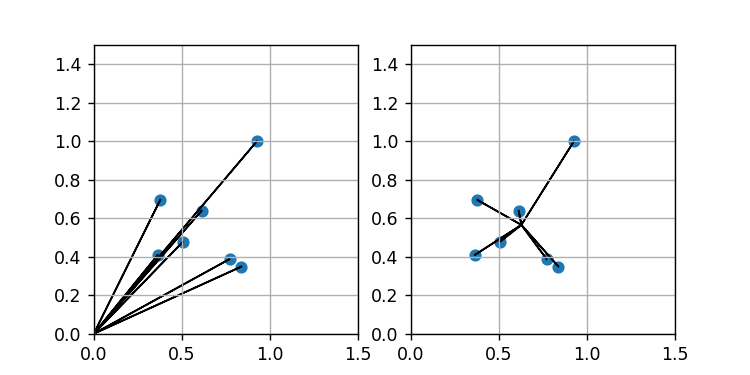

In [58]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,3))
for ax in (ax1, ax2):
    ax.grid(True)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(0, 1.5)
    
for x,y in pts:
    ax1.arrow(0, 0, x, y, head_width=0.00, head_length=0.00, fc='k', ec='k')
ax1.scatter(pts[:,0], pts[:,1])
ax1.set_xlim(0, 1.5)
ax1.set_ylim(0, 1.5)

for x,y in (pts - com):
    comx, comy = com
    ax2.arrow(com[0], com[1], x, y, head_width=0.0, head_length=0.00, fc='k', ec='k')
ax2.scatter(pts[:,0], pts[:,1])


In [32]:
pts

array([[ 0.37751924,  0.69530579],
       [ 0.77112631,  0.38788898],
       [ 0.83834392,  0.34893739],
       [ 0.50556518,  0.47739322],
       [ 0.92612808,  0.99994845],
       [ 0.36313158,  0.4091867 ],
       [ 0.61266912,  0.63932569]])

<IPython.core.display.Javascript object>


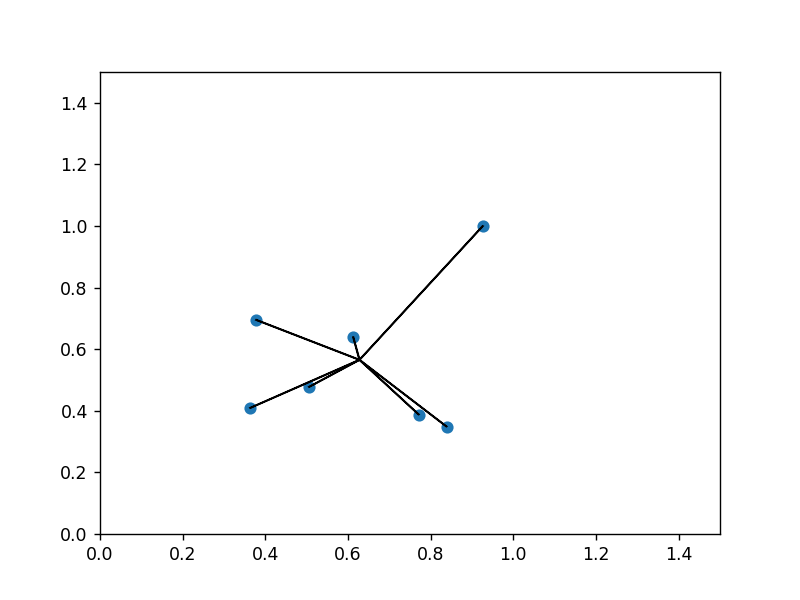

(0, 1.5)

In [46]:
fig, ax = plt.subplots()
for x,y in (pts - com):
    comx, comy = com
    ax.arrow(com[0], com[1], x, y, head_width=0.0, head_length=0.00, fc='k', ec='k')
ax.scatter(pts[:,0], pts[:,1])
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)

The function `broadcast_to` is available if you want to explicitly broadcast an array to a specified shape, yourself; you will not find yourself needing this function:
```python
# manually broadcasting `y` to a shape-(5,3) array
>>> np.broadcast_to(y, (5,3))
array([[ -1.,   2.,  10.],
       [ -1.,   2.,  10.],
       [ -1.,   2.,  10.],
       [ -1.,   2.,  10.],
       [ -1.,   2.,  10.]])
```

In [2]:
>>> import numpy as np
>>> x = np.array([[ 1.73,  0.02,  3.96],
                  [ 8.63,  8.82,  3.82],
                  [ 8.51,  8.97,  0.57],
                  [ 2.96,  8.92,  5.37],
                  [ 8.21,  9.69,  4.2 ]])

>>> y = np.array([-1., 2., 10.])

In [12]:
np.broadcast_to(y, (5,3))

array([[ -1.,   2.,  10.],
       [ -1.,   2.,  10.],
       [ -1.,   2.,  10.],
       [ -1.,   2.,  10.],
       [ -1.,   2.,  10.]])

In [1]:
from numpy_latex import to_latex

In [3]:
print(to_latex(x))

\newcolumntype{X}{D{.}{.}{1,3}}
\begin{array}{*{3}{X}}
  1.73 & 0.02 & 3.96 \\
  8.63 & 8.82 & 3.82 \\
  8.51 & 8.97 & 0.57 \\
  2.96 & 8.92 & 5.37 \\
  8.21 & 9.69 & 4.20
\end{array}



\begin{equation}
\begin{array}{*{3}{X}}
  \blacksquare & \blacksquare & 3.96 \\
  8.63 & 8.82 & 3.82 \\
  8.51 & \blacksquare & \blacksquare \\
  2.96 & 8.92 & 5.37 \\
  8.21 & \blacksquare & 4.20
\end{array}
\end{equation}

\begin{array}{*{3}{X}}
  1.73 & 0.02 & 3.96 \\
  8.63 & 8.82 & 3.82 \\
  8.51 & 8.97 & 0.57 \\
  2.96 & 8.92 & 5.37 \\
  8.21 & 9.69 & 4.20
\end{array}